In [4]:
# libraries needed in this model training
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# variables for image size, batch size, channels which will help in dataset related stuffs
ImageSize = 256
BatchSize = 32
Channels = 3
Epochs = 50

In [6]:
# loading the dataset intensorflow using image api
dataset = tf.keras.utils.image_dataset_from_directory(
    "dataset",
    shuffle=True,
    image_size= (ImageSize,ImageSize),
    batch_size= BatchSize
)

Found 2152 files belonging to 3 classes.


In [7]:
# loading class names(keras predefined function[class_names])
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
#length per group
len(dataset)

68

In [9]:
# why it's 68 is because every element is a batch of 32 images so 68*32 brings it even to 
# 2176 images which is the size of our dataset/class expept that the last batch is not perfect which is why its more than what we got!

68*32

2176

In [10]:
# this loops into the tensor(lebel_batch) and it returns the details about the tensor 
# (size,length,width,number of rgb channels) we then converted the tensor to numpy
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    

(32, 256, 256, 3)
[1 2 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 2 1 1 0 1 0 1 1 0 0 0 0 1 1 1]


In [11]:
# printing an image in the first place and .numpy() converts the number into a numpy which returns a 3d array
# you can also do .shape which returns the details of the image
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


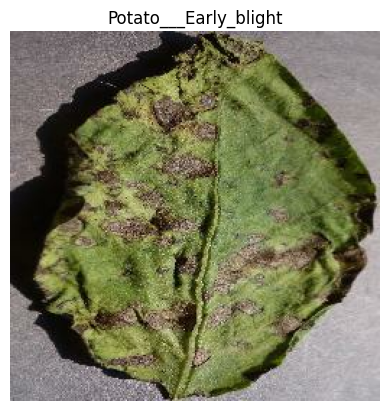

In [13]:
# visualizing an image using maplot(uint8 = converting the batch dimensions to big int)
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
# displaying the name of the image 
    plt.title(class_names[label_batch[1]])
# hiding the matplot axis-numbers
    plt.axis("off")#by turning it off the numbers on the axis disappear

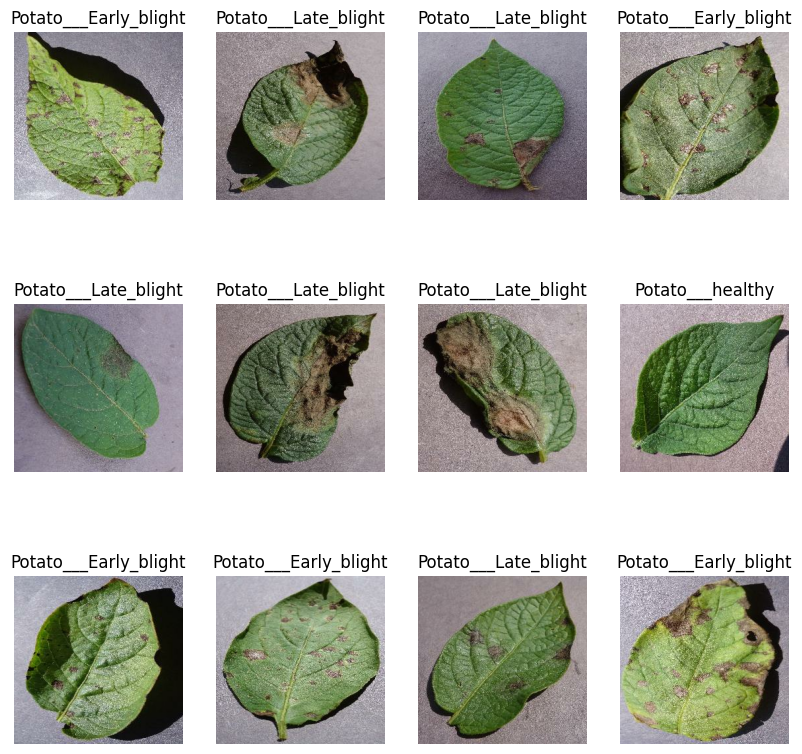

In [14]:
# display more than one image with their labels
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
# training size
# 80% ==> training
# test and validation size 
# 20% ==> 10% validation, 10% test

In [15]:
train_size = .8
len(dataset)*train_size

54.400000000000006

In [16]:
# divide images into train dataset
train_ds = dataset.take(54)
len(train_ds)

54

In [17]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
val_size = .1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
val_ds = test_ds.skip(6)
len(val_ds)

8

In [21]:
def get_dataset_partitions_tf(ds, train_split = .8, val_split = .1, test_split = .1,shuffle=True, shuffel_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffel_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
# caching process
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
# creating layers for preprocessing

In [28]:
# dividing image patterns form 0-255
#rescaling and resizing helps us to train our model in different image patterns like filters and sizes so that when a model
# meets that type of image in the outside world it will understand it
#start of cnn
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(ImageSize, ImageSize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
#dimensions
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(.2),
])

In [30]:
#rescaling to the acceptable size
input_shape = (BatchSize,ImageSize,ImageSize,Channels)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = 'softmax'),
    
    
])
model.build(input_shape = input_shape)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [32]:
model.compile(
        optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics = ['accuracy']
        
)        

In [33]:
history  = model.fit(
    train_ds,
    epochs = Epochs,
    batch_size = BatchSize,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 146s 3s/step - loss: 0.8957 - accuracy: 0.5081 - val_loss: 0.8084 - val_accuracy: 0.7072
Epoch 2/50
54/54 [==============================] - 143s 3s/step - loss: 0.6559 - accuracy: 0.7234 - val_loss: 0.4571 - val_accuracy: 0.8258
Epoch 3/50
54/54 [==============================] - 150s 3s/step - loss: 0.4018 - accuracy: 0.8333 - val_loss: 0.3456 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 147s 3s/step - loss: 0.3383 - accuracy: 0.8692 - val_loss: 0.2999 - val_accuracy: 0.8987
Epoch 5/50
54/54 [==============================] - 147s 3s/step - loss: 0.2798 - accuracy: 0.8889 - val_loss: 0.2076 - val_accuracy: 0.9051
Epoch 6/50
54/54 [==============================] - 144s 3s/step - loss: 0.2123 - accuracy: 0.9236 - val_loss: 0.2734 - val_accuracy: 0.8872
Epoch 7/50
54/54 [==============================] - 145s 3s/step - loss: 0.2102 - accuracy: 0.9149 - val_loss: 0.1514 - val_accuracy: 0.9450
Epoch 8/50
54

In [34]:
scores = model.evaluate(test_ds)

54/54 [==============================] - 33s 608ms/step - loss: 0.0352 - accuracy: 0.9878


In [35]:
scores

[0.035181473940610886, 0.9878472089767456]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
history.history['accuracy']

[0.5081018805503845,
 0.7233796119689941,
 0.8333333134651184,
 0.8692129850387573,
 0.8888888955116272,
 0.9236111044883728,
 0.9149305820465088,
 0.9409722089767456,
 0.9166666865348816,
 0.9317129850387573,
 0.9212962985038757,
 0.9508101940155029,
 0.9612268805503845,
 0.9577546119689941,
 0.9554398059844971,
 0.96875,
 0.9508101940155029,
 0.9641203880310059,
 0.9728009104728699,
 0.9832175970077515,
 0.9739583134651184,
 0.9791666865348816,
 0.9646990895271301,
 0.9722222089767456,
 0.9762731194496155,
 0.9872685074806213,
 0.9866898059844971,
 0.984375,
 0.9947916865348816,
 0.9832175970077515,
 0.9861111044883728,
 0.9751157164573669,
 0.9913194179534912,
 0.9901620149612427,
 0.9936342835426331,
 0.9872685074806213,
 0.9826388955116272,
 0.9884259104728699,
 0.9942129850387573,
 0.9947916865348816,
 0.9832175970077515,
 0.9907407164573669,
 0.9618055820465088,
 0.9826388955116272,
 0.9890046119689941,
 0.9901620149612427,
 0.9930555820465088,
 0.9884259104728699,
 0.9774305820

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

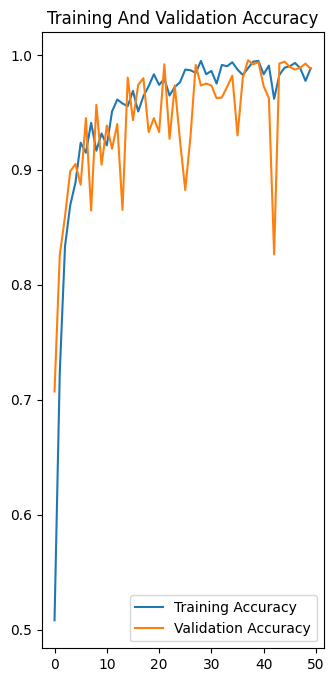

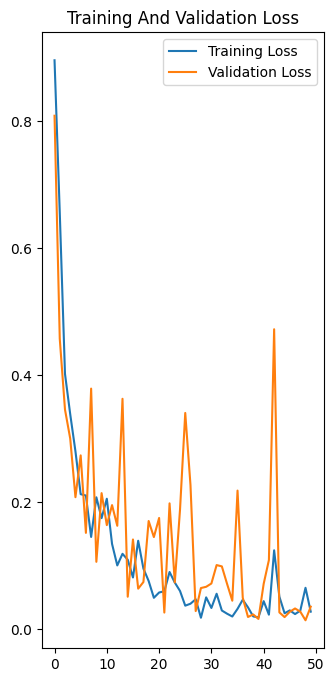

In [41]:
#ploting live results from training
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label = 'Training Accuracy')
plt.plot(range(Epochs),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

#ploting live results from loss
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label = 'Training Loss')
plt.plot(range(Epochs),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')
plt.show()

first image to predict
actual label:  Potato___Late_blight
1/1 [==============================] - 1s 877ms/step
predicted_lable Potato___Late_blight


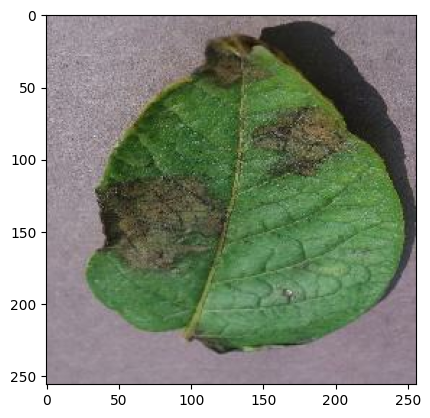

In [42]:
#prediction section
for image_batch, labels_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted_lable",class_names[np.argmax(batch_prediction[0])])

In [43]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #creating a batch
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


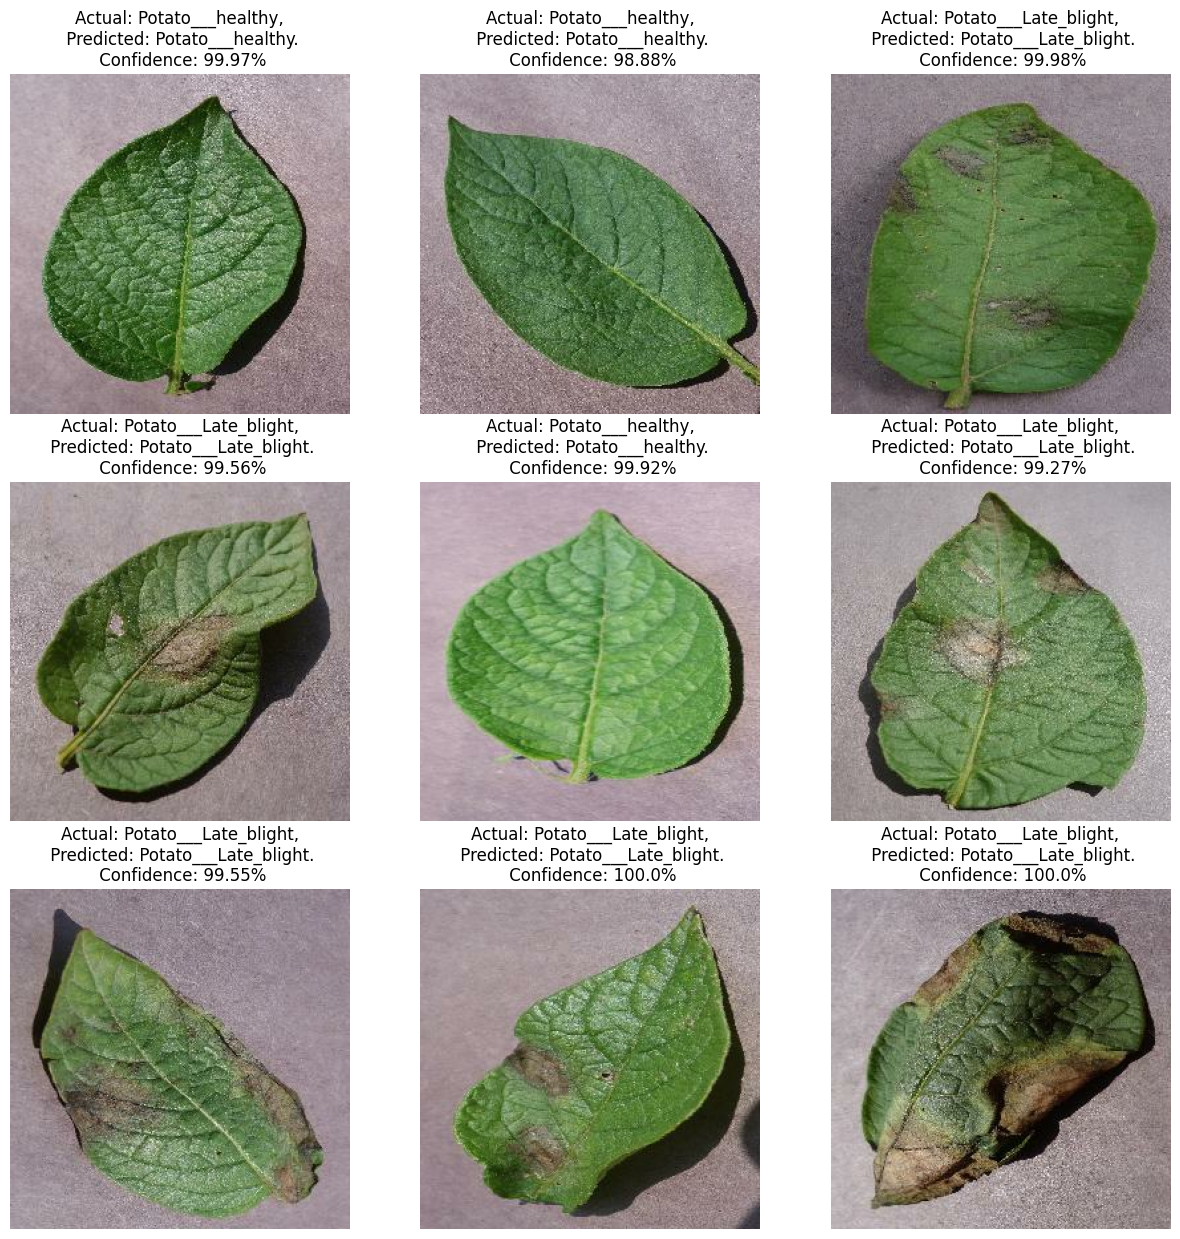

In [44]:
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [45]:
import os
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/6\assets


INFO:tensorflow:Assets written to: ../models/6\assets
